In [1]:
import pandas as pd
import numpy as np

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
#import seaborn as sns

movies = pd.read_csv("C:/Users/vrajb/OneDrive/Documents/ML Project/files/movies.csv")

ratings = pd.read_csv("C:/Users/vrajb/OneDrive/Documents/ML Project/files/ratings.csv")

In [2]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

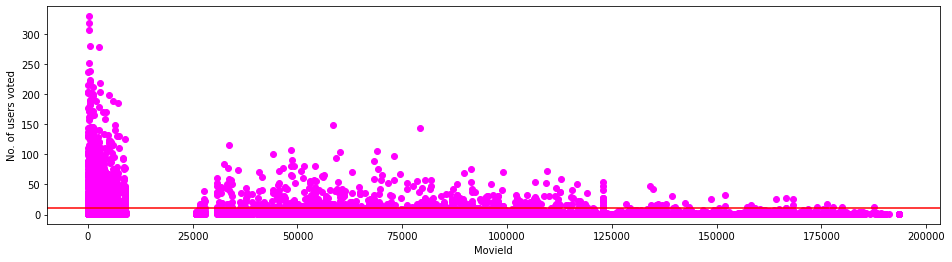

In [7]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='magenta')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [8]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

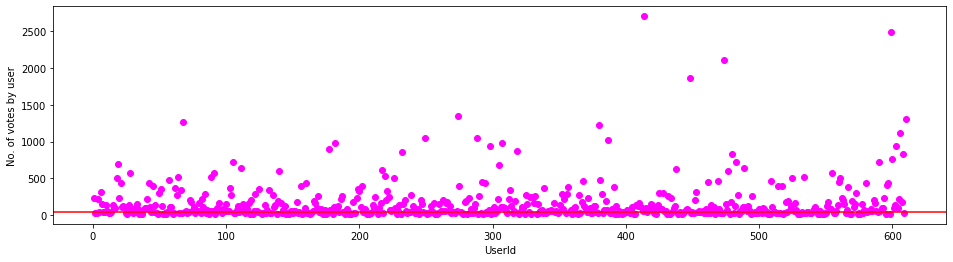

In [9]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='magenta')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [10]:
final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]

#print(final_dataset.where(final_dataset['movieId'] == 163134))

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
#sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
#print(sparsity)

sparsity = 1.0 - (np.count_nonzero(final_dataset) / float(final_dataset.size))
print(sparsity)

0.9384484584289811


In [12]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [13]:
knn = NearestNeighbors(metric='euclidean', algorithm='brute', n_neighbors=20, n_jobs=-1) #cosine

In [14]:
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='euclidean', n_jobs=-1,
                 n_neighbors=20)

In [15]:
def get_movie_recommendation(movie_name,n):
    n_movies_to_reccomend = n
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        
        recommend_frame = []
        
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index

            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        
        #df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        df = pd.DataFrame(recommend_frame,index=range(n_movies_to_reccomend,0,-1))
        output = df[::-1]
        return output
    
    else:
        
        return "No movies found. Please check your input"

In [16]:
get_movie_recommendation('Thor ',10)

,Title,Distance
1,Captain America: The First Avenger (2011),14.730920
2,Thor: The Dark World (2013),15.795569
3,Avengers: Age of Ultron (2015),17.095321
4,"Incredible Hulk, The (2008)",17.269916
5,X-Men Origins: Wolverine (2009),17.464249
6,Man of Steel (2013),17.930421
7,Pirates of the Caribbean: On Stranger Tides (2...,18.248288
8,Fantastic Four: Rise of the Silver Surfer (2007),18.479719
9,Men in Black III (M.III.B.) (M.I.B.³) (2012),18.527007
10,X-Men: Days of Future Past (2014),18.580904


In [17]:
get_movie_recommendation('Harry Potter',5)

,Title,Distance
1,Harry Potter and the Chamber of Secrets (2002),25.763346
2,Harry Potter and the Goblet of Fire (2005),27.608875
3,Harry Potter and the Prisoner of Azkaban (2004),28.995689
4,Harry Potter and the Half-Blood Prince (2009),31.859065
5,Harry Potter and the Deathly Hallows: Part 1 (...,32.542280
